# Analyze Diamonds by their cut, color, clarity, price, and other attributes

# Import Library Python

In [1]:
import numpy as np
import pandas as pd

# Read a csv file from a specified source and print the first 5 rows

In [2]:
data = pd.read_csv("diamonds.csv")

In [3]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
data.rename(columns={"Unnamed: 0":"id","x":"Length in mm","y":"Width in mm","z":"Depth in mm","carat":"Carat","cut":"Cut","color":"Color","clarity":"Clarity","depth":"Depth","table":"Table","price":"Price"},inplace=True)

In [6]:
#   Carat = weight of the diamond (0.2--5.01)
#   Cut = quality of the cut (Fair, Good, Very Good, Premium, Ideal)
#   Color = diamond colour, from J (worst) to D (best)
#   Clarity = a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
#   Depth = total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
#   Table = width of top of diamond relative to widest point (43--95)
#   Price = price in US dollars (\$326--\$18,823)
#   Length in mm (0--10.74)
#   Width in mm (0--58.9)
#   Depth in mm (0--31.8)

In [7]:
data

,id,Carat,Cut,Color,Clarity,Depth,Table,Price,Length in mm,Width in mm,Depth in mm
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
data.set_index("id",inplace=True)

In [9]:
data.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,Length in mm,Width in mm,Depth in mm
id,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
data["Price"]

id
1         326
2         326
3         327
4         334
5         335
         ... 
53936    2757
53937    2757
53938    2757
53939    2757
53940    2757
Name: Price, Length: 53940, dtype: int64

In [11]:
data["Quality"] = ( data["Color"] + " , " +data["Cut"])

In [12]:
data.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,Length in mm,Width in mm,Depth in mm,Quality
id,,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"E , Ideal"
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"E , Premium"
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"E , Good"
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"I , Premium"
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"J , Good"


In [13]:
data.drop(["Cut","Color"],axis=1)

,Carat,Clarity,Depth,Table,Price,Length in mm,Width in mm,Depth in mm,Quality
id,,,,,,,,,
1,0.23,SI2,61.5,55.0,326,3.95,3.98,2.43,"E , Ideal"
2,0.21,SI1,59.8,61.0,326,3.89,3.84,2.31,"E , Premium"
3,0.23,VS1,56.9,65.0,327,4.05,4.07,2.31,"E , Good"
4,0.29,VS2,62.4,58.0,334,4.20,4.23,2.63,"I , Premium"
5,0.31,SI2,63.3,58.0,335,4.34,4.35,2.75,"J , Good"
...,...,...,...,...,...,...,...,...,...
53936,0.72,SI1,60.8,57.0,2757,5.75,5.76,3.50,"D , Ideal"
53937,0.72,SI1,63.1,55.0,2757,5.69,5.75,3.61,"D , Good"
53938,0.70,SI1,62.8,60.0,2757,5.66,5.68,3.56,"D , Very Good"


In [14]:
data.drop([1,2],axis=0)

,Carat,Cut,Color,Clarity,Depth,Table,Price,Length in mm,Width in mm,Depth in mm,Quality
id,,,,,,,,,,,
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"E , Good"
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"I , Premium"
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"J , Good"
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,"J , Very Good"
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,"I , Very Good"
...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,"D , Ideal"
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,"D , Good"
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,"D , Very Good"


In [15]:
data.sort_values("Cut",ascending=True)

,Carat,Cut,Color,Clarity,Depth,Table,Price,Length in mm,Width in mm,Depth in mm,Quality
id,,,,,,,,,,,
3851,1.01,Fair,F,SI2,64.8,55.0,3477,6.37,6.26,4.10,"F , Fair"
51465,1.20,Fair,G,I1,66.6,57.0,2376,6.57,6.50,4.34,"G , Fair"
51467,0.90,Fair,G,SI2,65.4,57.0,2376,6.01,5.97,3.98,"G , Fair"
10238,1.26,Fair,D,SI2,64.5,59.0,4746,6.75,6.71,4.34,"D , Fair"
10761,1.01,Fair,E,SI1,69.5,55.0,4853,6.00,5.94,4.15,"E , Fair"
...,...,...,...,...,...,...,...,...,...,...,...
7403,0.33,Very Good,G,VS2,62.8,54.0,579,4.40,4.42,2.77,"G , Very Good"
43102,0.57,Very Good,E,SI2,58.8,57.3,1384,5.42,5.46,3.21,"E , Very Good"
16894,1.00,Very Good,G,VS2,62.2,58.0,6743,6.35,6.39,3.96,"G , Very Good"


In [16]:
data.sort_values(by=["Price"],ascending=True)

,Carat,Cut,Color,Clarity,Depth,Table,Price,Length in mm,Width in mm,Depth in mm,Quality
id,,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"E , Ideal"
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"E , Premium"
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"E , Good"
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"I , Premium"
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"J , Good"
...,...,...,...,...,...,...,...,...,...,...,...
27746,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01,"H , Very Good"
27747,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,"G , Ideal"
27748,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,"G , Ideal"


In [17]:
data

,Carat,Cut,Color,Clarity,Depth,Table,Price,Length in mm,Width in mm,Depth in mm,Quality
id,,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"E , Ideal"
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"E , Premium"
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"E , Good"
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"I , Premium"
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"J , Good"
...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,"D , Ideal"
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,"D , Good"
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,"D , Very Good"


In [18]:
filt = data["Carat"] >=0.3
data[filt]

,Carat,Cut,Color,Clarity,Depth,Table,Price,Length in mm,Width in mm,Depth in mm,Quality
id,,,,,,,,,,,
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"J , Good"
11,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73,"J , Good"
14,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71,"J , Ideal"
16,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68,"E , Premium"
17,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68,"I , Ideal"
...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,"D , Ideal"
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,"D , Good"
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,"D , Very Good"


In [34]:
filt = (data["Length in mm"] >5 ) & (data["Width in mm"]>5) & (data["Depth in mm"]>5)
data[filt]

,Carat,Cut,Color,Clarity,Depth,Table,Price,Length in mm,Width in mm,Depth in mm,Quality
id,,,,,,,,,,,
11779,1.83,Fair,J,I1,70.0,58.0,5083,7.34,7.28,5.12,"J , Fair"
13003,2.14,Fair,J,I1,69.4,57.0,5405,7.74,7.70,5.36,"J , Fair"
13119,2.15,Fair,J,I1,65.5,57.0,5430,8.01,7.95,5.23,"J , Fair"
13563,1.96,Fair,F,I1,66.6,60.0,5554,7.59,7.56,5.04,"F , Fair"
13758,2.22,Fair,J,I1,66.7,56.0,5607,8.04,8.02,5.36,"J , Fair"
...,...,...,...,...,...,...,...,...,...,...,...
27749,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,"G , Very Good"
27750,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16,"I , Premium"
48411,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,"E , Very Good"


In [36]:
filt = (data["Cut"] == "Premium" ) | (data["Cut"] == "Ideal")
data[filt]

,Carat,Cut,Color,Clarity,Depth,Table,Price,Length in mm,Width in mm,Depth in mm,Quality
id,,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"E , Ideal"
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"E , Premium"
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"I , Premium"
12,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46,"J , Ideal"
13,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33,"F , Premium"
...,...,...,...,...,...,...,...,...,...,...,...
53932,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43,"F , Premium"
53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,"D , Premium"
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,"D , Ideal"


In [38]:
data.columns

Index(['Carat', 'Cut', 'Color', 'Clarity', 'Depth', 'Table', 'Price',
       'Length in mm', 'Width in mm', 'Depth in mm', 'Quality'],
      dtype='object')

In [39]:
data.describe()

,Carat,Depth,Table,Price,Length in mm,Width in mm,Depth in mm
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [40]:
data.mean()

Carat              0.797940
Depth             61.749405
Table             57.457184
Price           3932.799722
Length in mm       5.731157
Width in mm        5.734526
Depth in mm        3.538734
dtype: float64

In [42]:
data["Price"].mean()

3932.799721913237

In [43]:
data["Price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: Price, dtype: float64

In [45]:
cut_groups = data.groupby("Cut")

In [46]:
cut_groups.size()

Cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
dtype: int64

In [47]:
cut_groups.describe()

Carat                                                      Depth  \
             count      mean       std   min   25%   50%   75%   max    count   
Cut                                                                             
Fair        1610.0  1.046137  0.516404  0.22  0.70  1.00  1.20  5.01   1610.0   
Good        4906.0  0.849185  0.454054  0.23  0.50  0.82  1.01  3.01   4906.0   
Ideal      21551.0  0.702837  0.432876  0.20  0.35  0.54  1.01  3.50  21551.0   
Premium    13791.0  0.891955  0.515262  0.20  0.41  0.86  1.20  4.01  13791.0   
Very Good  12082.0  0.806381  0.459435  0.20  0.41  0.71  1.02  4.00  12082.0   

                      ... Width in mm        Depth in mm                      \
                mean  ...         75%    max       count      mean       std   
Cut                   ...                                                      
Fair       64.041677  ...       6.640  10.54      1610.0  3.982770  0.651638   
Good       62.365879  ...       6.440   9.38      4906.0  3.639507  0.654893   
Ideal      61.709401  ...       6.445  31.80     21551.0  3.401448  0.657648   
Premium    61.264673  ...       6.760  58.90     13791.0  3.647124  0.731161   
Very Good  61.818275  ...       6.510   9.94     12082.0  3.559801  0.730228   

                                         
           min   25%   50%   75%    max  
Cut                                      
Fair       0.0  3.61  3.97  4.28   6.98  
Good       0.0  3.07  3.70  4.03   5.79  
Ideal      0.0  2.80  3.23  3.98   6.03  
Premium    0.0  2.94  3.72  4.16   8.06  
Very Good  0.0  2.95  3.56  4.02  31.80  

[5 rows x 56 columns]

In [49]:
cut_groups["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Cut,,,,,,,,
Fair,1610.0,4358.757764,3560.386612,337.0,2050.25,3282.0,5205.50,18574.0
Good,4906.0,3928.864452,3681.589584,327.0,1145.00,3050.5,5028.00,18788.0
Ideal,21551.0,3457.541970,3808.401172,326.0,878.00,1810.0,4678.50,18806.0
Premium,13791.0,4584.257704,4349.204961,326.0,1046.00,3185.0,6296.00,18823.0
Very Good,12082.0,3981.759891,3935.862161,336.0,912.00,2648.0,5372.75,18818.0


In [70]:
data["Cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: Cut, dtype: int64

In [58]:
total = data['Cut'].count()
total.dtype

dtype('int32')

In [64]:
per = cut_groups.get_group('Ideal').count()/total

In [65]:
per

Carat           0.399537
Cut             0.399537
Color           0.399537
Clarity         0.399537
Depth           0.399537
Table           0.399537
Price           0.399537
Length in mm    0.399537
Width in mm     0.399537
Depth in mm     0.399537
Quality         0.399537
dtype: float64

In [67]:
for i in data["Cut"].value_counts() :
    print (i/total)

0.3995365220615499
0.2556729699666296
0.22398961809417872
0.09095291064145347
0.029847979236188357


In [72]:
for i in cut_groups.size() :
    print (f'i = {i/total}')


i = 0.029847979236188357
i = 0.09095291064145347
i = 0.3995365220615499
i = 0.2556729699666296
i = 0.22398961809417872


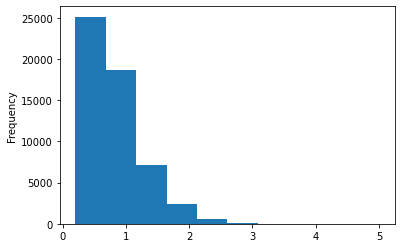

In [74]:
data['Carat'].plot(kind='hist')

In [75]:
data.isnull()

,Carat,Cut,Color,Clarity,Depth,Table,Price,Length in mm,Width in mm,Depth in mm,Quality
id,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
53936,False,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False,False


In [76]:
data.isnull().sum()

Carat           0
Cut             0
Color           0
Clarity         0
Depth           0
Table           0
Price           0
Length in mm    0
Width in mm     0
Depth in mm     0
Quality         0
dtype: int64

In [79]:
data.dropna(how="any").shape

(53940, 11)

In [83]:
filt = data["Cut"] == "Premium"
data[filt].loc[:,"Color"]

id
2        E
4        I
13       F
15       E
16       E
        ..
53929    E
53931    E
53932    F
53935    D
53939    H
Name: Color, Length: 13791, dtype: object

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat         53940 non-null  float64
 1   Cut           53940 non-null  object 
 2   Color         53940 non-null  object 
 3   Clarity       53940 non-null  object 
 4   Depth         53940 non-null  float64
 5   Table         53940 non-null  float64
 6   Price         53940 non-null  int64  
 7   Length in mm  53940 non-null  float64
 8   Width in mm   53940 non-null  float64
 9   Depth in mm   53940 non-null  float64
 10  Quality       53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 7.4+ MB


In [88]:
data.duplicated().sum()

146

In [90]:
data["Clarity"].duplicated().sum()

53932

In [92]:
data["Clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: Clarity, dtype: int64